In [35]:
from skimage.data import human_mitosis
import numpy as np
from tifffile import imwrite, imread
from matplotlib import pyplot as plt
from csbdeep.utils import normalize
from skimage.segmentation import mark_boundaries
from skimage.exposure import rescale_intensity
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from stardist.models import StarDist2D
from cellpose import models

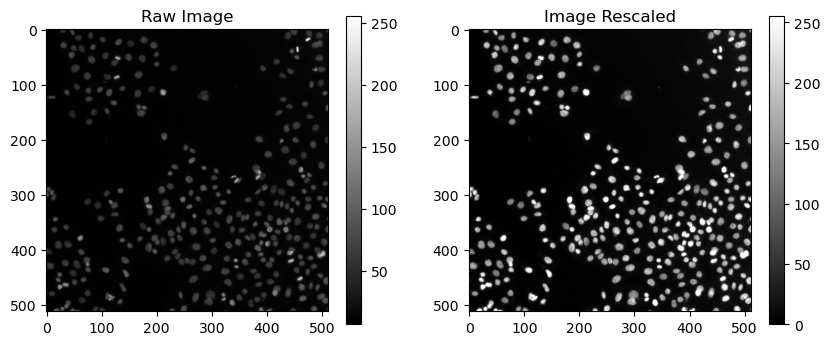

In [52]:
# img = imread('./../data/protein_atlas/551_C10_1.tif', key=0)
img = human_mitosis()

percentiles = np.percentile(img, (1, 99))
img_scaled = rescale_intensity(img, in_range=tuple(percentiles))

f, axes = plt.subplots(1,2, figsize=(10,4))
im1 = axes[0].imshow(img, cmap='gray')
im2 = axes[1].imshow(img_scaled, cmap='gray')
axes[0].set_title('Raw Image')
axes[1].set_title('Image Rescaled')

plt.colorbar(im1)
plt.colorbar(im2)
plt.show()

In [22]:
# Stardist
model = StarDist2D.from_pretrained('2D_versatile_fluo')
labels, _ = model.predict_instances(normalize(img))

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
1/1 [==============================] - 0s 455ms/step


In [27]:
# Cellpose
model = models.Cellpose(model_type='cyto2')
channels = [0,0]
masks, flows, styles, diams = model.eval(img, diameter=15, channels=channels)

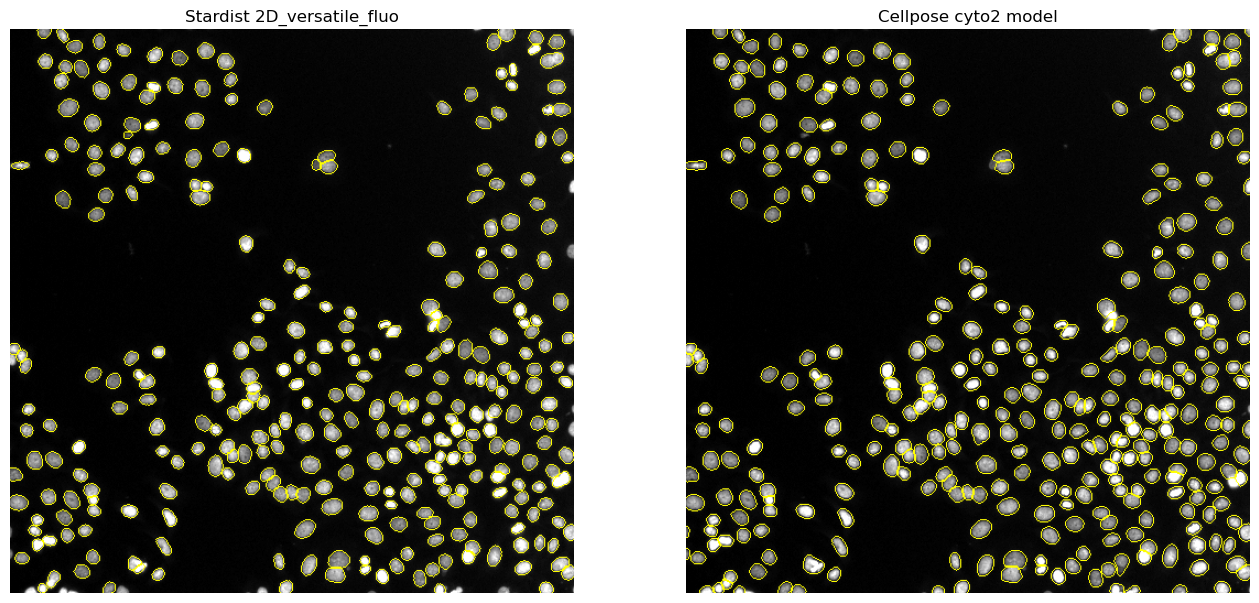

In [39]:
# Display comparison
f, axes = plt.subplots(1,2, figsize=(16,16))
axes[0].imshow(mark_boundaries(img_scaled, labels))
axes[0].set_title('Stardist 2D_versatile_fluo')
axes[1].imshow(mark_boundaries(img_scaled, masks))
axes[1].set_title('Cellpose cyto2 model')

for ax in axes:
    ax.axis('off')
plt.show()